In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import missingno as msno
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("output.csv")
df

,title,price,link,address,total_area,living_area,kitchen_area,floor,house_type,built_year,bathroom,balcony,renovation,ceiling_height,price_per_m2,building_series,elevator,parking,description
0,"2-комн. квартира, 42,14 м², 2/9 этаж",5 200 076 ₽,https://krasnoyarsk.cian.ru/sale/flat/305775967/,"Красноярский край , Красноярск , р-н Октябрьск...","42,14 м²",NaN,NaN,2 из 9,Новостройка,2026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Видовая 2-комнатная квартира,6 300 000 ₽,https://krasnoyarsk.cian.ru/sale/flat/316790539/,"Красноярский край , Красноярск , р-н Центральн...","40,1 м²",28 м²,7 м²,9 из 9,Панельный,1973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1-комн. квартира, 27,17 м², 8/9 этаж",4 170 595 ₽,https://krasnoyarsk.cian.ru/sale/flat/302881594/,"Красноярский край , Красноярск , р-н Октябрьск...","27,17 м²",NaN,NaN,8 из 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1-комн. квартира, 40,5 м², 1/10 этаж",4 680 000 ₽,https://krasnoyarsk.cian.ru/sale/flat/315632345/,"Красноярский край , Красноярск , р-н Советский...","40,5 м²","16,8 м²","8,4 м²",1 из 10,NaN,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2-комн. квартира, 37,8 м², 21/24 этаж",5 097 330 ₽,https://krasnoyarsk.cian.ru/sale/flat/314419600/,"Красноярский край , Красноярск , р-н Кировский...","37,8 м²",NaN,NaN,21 из 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,"3-комн. квартира, 80,23 м², 3/16 этаж",13 000 000 ₽,https://krasnoyarsk.cian.ru/sale/flat/294992320/,"Красноярский край , Красноярск , р-н Советский...","80,23 м²",NaN,NaN,3 из 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,"3-комн. квартира, 80,69 м², 6/16 этаж",13 000 000 ₽,https://krasnoyarsk.cian.ru/sale/flat/294992299/,"Красноярский край , Красноярск , р-н Советский...","80,69 м²",NaN,NaN,6 из 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,"4-комн. квартира, 93,17 м², 5/8 этаж",13 100 000 ₽,https://krasnoyarsk.cian.ru/sale/flat/312695382/,"Красноярский край , Красноярск , р-н Октябрьск...","93,17 м²",NaN,NaN,5 из 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1482,"4-комн. квартира, 91,94 м², 5/8 этаж",13 100 000 ₽,https://krasnoyarsk.cian.ru/sale/flat/291853674/,"Красноярский край , Красноярск , р-н Октябрьск...","91,94 м²",NaN,NaN,5 из 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


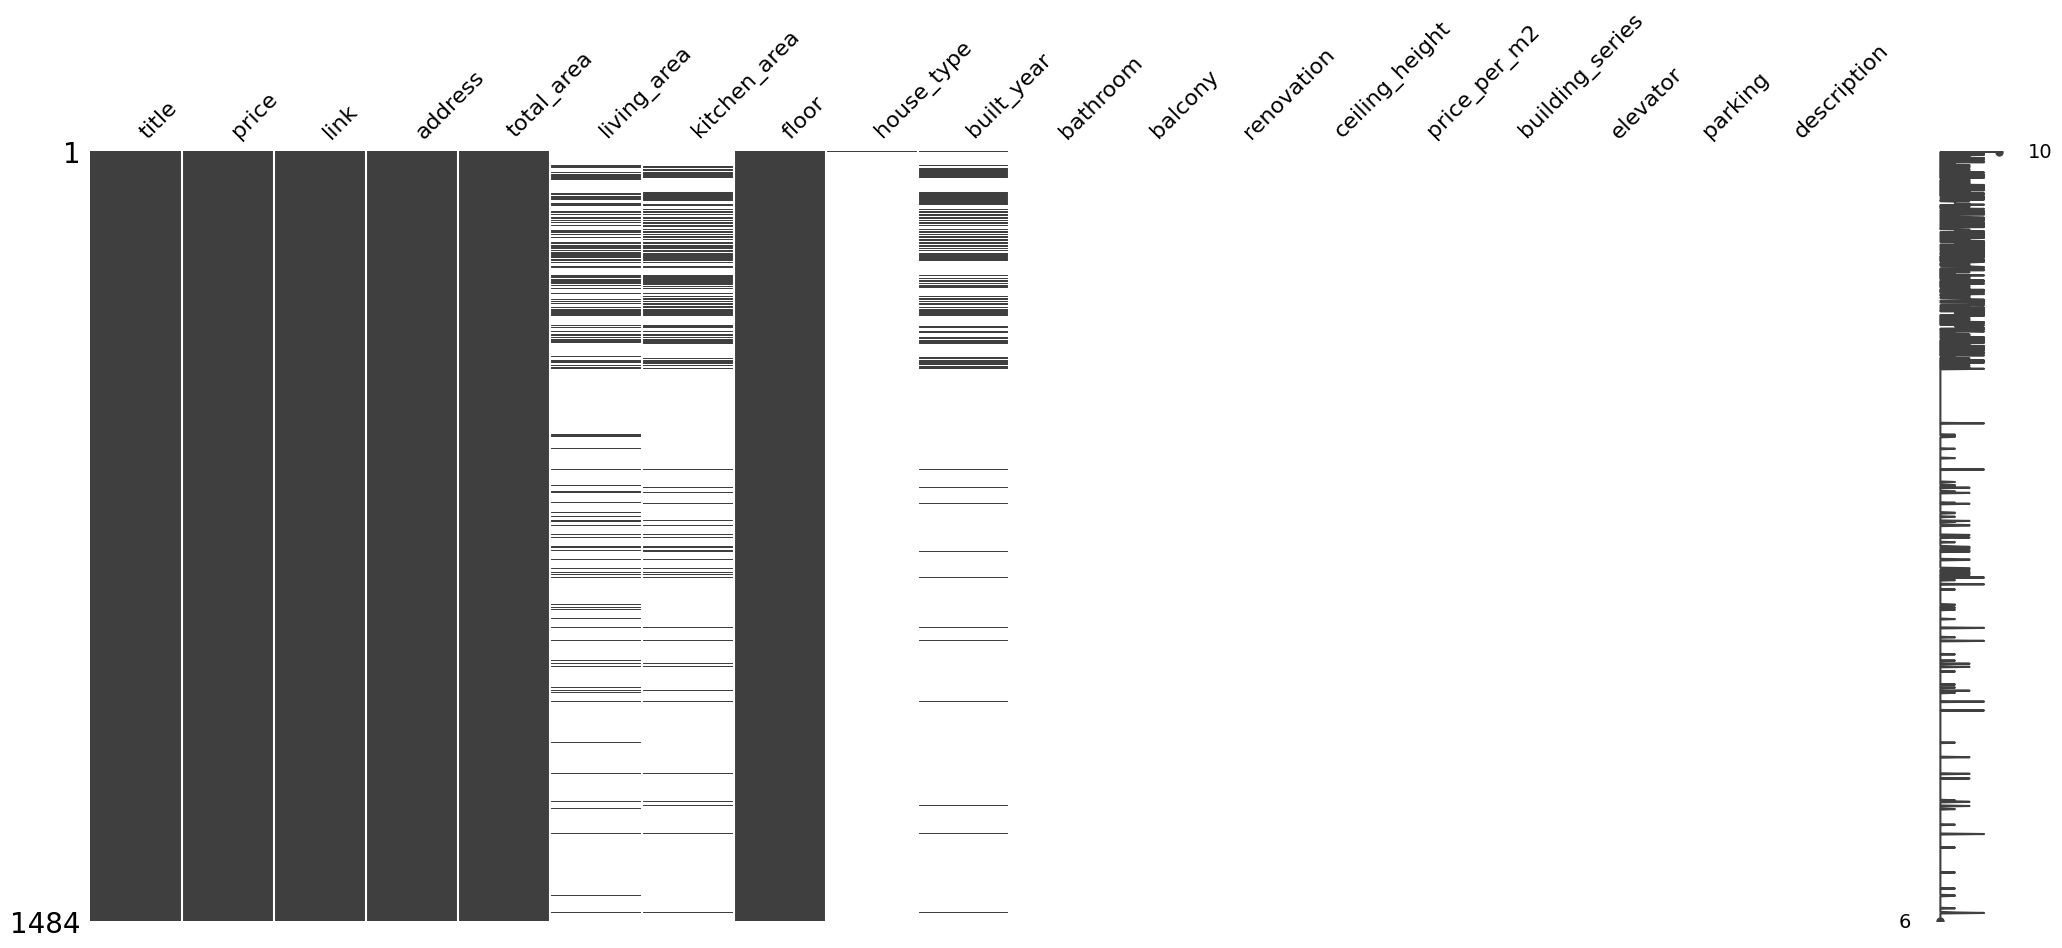

In [119]:
msno.matrix(df);

In [120]:
df_train = df.drop(["title", "link", "balcony", "renovation", "ceiling_height", "price_per_m2", "building_series",
                   "elevator", "parking", "description", "bathroom", "kitchen_area", "house_type"], axis=1)

In [121]:
df_train

,price,address,total_area,living_area,floor,built_year
0,5 200 076 ₽,"Красноярский край , Красноярск , р-н Октябрьск...","42,14 м²",NaN,2 из 9,2026.0
1,6 300 000 ₽,"Красноярский край , Красноярск , р-н Центральн...","40,1 м²",28 м²,9 из 9,1973.0
2,4 170 595 ₽,"Красноярский край , Красноярск , р-н Октябрьск...","27,17 м²",NaN,8 из 9,NaN
3,4 680 000 ₽,"Красноярский край , Красноярск , р-н Советский...","40,5 м²","16,8 м²",1 из 10,2009.0
4,5 097 330 ₽,"Красноярский край , Красноярск , р-н Кировский...","37,8 м²",NaN,21 из 24,NaN
...,...,...,...,...,...,...
1479,13 000 000 ₽,"Красноярский край , Красноярск , р-н Советский...","80,23 м²",NaN,3 из 16,NaN
1480,13 000 000 ₽,"Красноярский край , Красноярск , р-н Советский...","80,69 м²",NaN,6 из 16,NaN
1481,13 100 000 ₽,"Красноярский край , Красноярск , р-н Октябрьск...","93,17 м²",NaN,5 из 8,NaN
1482,13 100 000 ₽,"Красноярский край , Красноярск , р-н Октябрьск...","91,94 м²",NaN,5 из 8,NaN


In [122]:
# напишем функцию для обработки цены
def change_price(price):
    price = price[:-2]
    price = "".join(price.split())
    price = int(price) / 1_000_000
    return price

In [123]:
# поработаем с полем price (теперь цена в мл.руб)
df_train["price"] = df_train["price"].apply(change_price)

In [124]:
df_train

,price,address,total_area,living_area,floor,built_year
0,5.200076,"Красноярский край , Красноярск , р-н Октябрьск...","42,14 м²",NaN,2 из 9,2026.0
1,6.300000,"Красноярский край , Красноярск , р-н Центральн...","40,1 м²",28 м²,9 из 9,1973.0
2,4.170595,"Красноярский край , Красноярск , р-н Октябрьск...","27,17 м²",NaN,8 из 9,NaN
3,4.680000,"Красноярский край , Красноярск , р-н Советский...","40,5 м²","16,8 м²",1 из 10,2009.0
4,5.097330,"Красноярский край , Красноярск , р-н Кировский...","37,8 м²",NaN,21 из 24,NaN
...,...,...,...,...,...,...
1479,13.000000,"Красноярский край , Красноярск , р-н Советский...","80,23 м²",NaN,3 из 16,NaN
1480,13.000000,"Красноярский край , Красноярск , р-н Советский...","80,69 м²",NaN,6 из 16,NaN
1481,13.100000,"Красноярский край , Красноярск , р-н Октябрьск...","93,17 м²",NaN,5 из 8,NaN
1482,13.100000,"Красноярский край , Красноярск , р-н Октябрьск...","91,94 м²",NaN,5 из 8,NaN


In [125]:
# напишем функцию для обработки района
def change_district(district):
    result_district = ""
    for i in range(district.index("р-н")+4, len(district)):
        if district[i] == " ":
            return result_district
        result_district += district[i]

In [126]:
# поработаем с полем address, оставим только район
df_train["address"] = df_train["address"].apply(change_district)

In [127]:
df_train

,price,address,total_area,living_area,floor,built_year
0,5.200076,Октябрьский,"42,14 м²",NaN,2 из 9,2026.0
1,6.300000,Центральный,"40,1 м²",28 м²,9 из 9,1973.0
2,4.170595,Октябрьский,"27,17 м²",NaN,8 из 9,NaN
3,4.680000,Советский,"40,5 м²","16,8 м²",1 из 10,2009.0
4,5.097330,Кировский,"37,8 м²",NaN,21 из 24,NaN
...,...,...,...,...,...,...
1479,13.000000,Советский,"80,23 м²",NaN,3 из 16,NaN
1480,13.000000,Советский,"80,69 м²",NaN,6 из 16,NaN
1481,13.100000,Октябрьский,"93,17 м²",NaN,5 из 8,NaN
1482,13.100000,Октябрьский,"91,94 м²",NaN,5 из 8,NaN


In [128]:
# поработаем с total_area
df_train["total_area"] = df_train["total_area"].apply(lambda x: x if pd.isna(x) else float(x[:-3].replace(",", ".")))

In [129]:
# поработаем с living_area
df_train["living_area"] = df_train["living_area"].apply(lambda x: x if pd.isna(x) else float(x[:-3].replace(",", ".")))

living_area_procents = []
for index, row in df_train.iterrows():
    if not pd.isna(row["living_area"]):
        living_area_procents.append((row["living_area"] / row["total_area"]) * 100)
mean_procent_living_area = np.array(living_area_procents).mean()

# заполним пропуски в living_area
new_living_area = []
for index, row in df_train.iterrows():
    if pd.isna(row["living_area"]):
        new_living_area.append(row["total_area"] * (mean_procent_living_area / 100))
    else:
        new_living_area.append(row["living_area"])
df_train["living_area"] = new_living_area

In [130]:
df_train

,price,address,total_area,living_area,floor,built_year
0,5.200076,Октябрьский,42.14,25.049629,2 из 9,2026.0
1,6.300000,Центральный,40.10,28.000000,9 из 9,1973.0
2,4.170595,Октябрьский,27.17,16.150888,8 из 9,NaN
3,4.680000,Советский,40.50,16.800000,1 из 10,2009.0
4,5.097330,Кировский,37.80,22.469767,21 из 24,NaN
...,...,...,...,...,...,...
1479,13.000000,Советский,80.23,47.691784,3 из 16,NaN
1480,13.000000,Советский,80.69,47.965225,6 из 16,NaN
1481,13.100000,Октябрьский,93.17,55.383815,5 из 8,NaN
1482,13.100000,Октябрьский,91.94,54.652656,5 из 8,NaN


In [131]:
# напишем фукнцию для обработки поля floor
def change_floor(floor):
    new_floor = ""
    for i in range(len(floor)):
        if floor[i] == " ":
            return new_floor
        new_floor += floor[i]

In [132]:
# поработаем с полем floor
df_train["floor"] = df_train["floor"].apply(change_floor)

In [133]:
df_train["built_year"] = df_train["built_year"].apply(lambda x: df_train["built_year"].median() if pd.isna(x) else x)

In [134]:
# разобем на train и test
X = df_train.drop("price", axis=1)
y = df_train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# закодируем поле address с помощью OHE
encoder = OneHotEncoder(sparse_output=False)

encoder.fit(X_train[["address"]])
one_hot_df = pd.DataFrame(encoder.transform(X_train[["address"]]), columns=encoder.get_feature_names_out(), index=X_train.index)

df_encoded = pd.concat([X_train, one_hot_df], axis=1)
X_train = df_encoded.drop("address", axis=1)

In [136]:
encoder.get_feature_names_out()

array(['address_Железнодорожный', 'address_Кировский',
       'address_Ленинский', 'address_Октябрьский', 'address_Свердловский',
       'address_Советский', 'address_Центральный'], dtype=object)

In [137]:
X_train

,total_area,living_area,floor,built_year,address_Железнодорожный,address_Кировский,address_Ленинский,address_Октябрьский,address_Свердловский,address_Советский,address_Центральный
381,31.00,17.000000,5,1970.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
532,49.97,29.704081,17,2002.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
674,57.16,33.978093,2,2002.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
482,39.48,23.468424,2,2002.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
405,37.40,20.100000,1,1950.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1130,65.60,38.995152,3,2002.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,89.50,53.202227,20,2002.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,59.20,35.190747,16,2002.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1459,78.56,46.699072,2,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [138]:
# выполним нормализацию данных
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=scaler.feature_names_in_, index=X_train.index)

In [139]:
# обработаем X_test
one_hot_df_test = pd.DataFrame(encoder.transform(X_test[["address"]]), columns=encoder.get_feature_names_out(), index=X_test.index)

df_encoded_test = pd.concat([X_test, one_hot_df_test], axis=1)
X_test = df_encoded_test.drop("address", axis=1)

X_test = pd.DataFrame(scaler.transform(X_test), columns=scaler.feature_names_in_, index=X_test.index)

#### Линейная регрессия

#### Напишем свою линейную регрессию

In [154]:
class MyLinearRegression:
    def __init__(self, lr=0.1):
        self.lr = lr
        self.w = None
        self.w0 = None
        self.story = []

    def mse(self, y, y_pred):
        n = len(y_pred)
        return (1 / n) * np.sum((y - y_pred) ** 2)

    def grad(self, X, y, y_pred):
        n = len(y_pred)
        return (2 / n) * (y - y_pred) @ (-X)

    def fit(self, X, y, epochs=20000, lr=0.1):
        if self.w is None:
            ones_column = np.ones((X.shape[0], 1))
            X = np.hstack([ones_column, X])
            self.w = np.zeros(X.shape[1])
        if self.w0 is None:
            self.w0 = 0

        for epoch in range(epochs):
            y_pred = X @ self.w
            grad = self.grad(X, y, y_pred)
            self.w -= lr * grad
            loss = self.mse(y, y_pred)
            self.story.append((loss ** 0.5) * 1000000)

        self.w0 = self.w[0]


    def predict(self, X_test):
        ones_column = np.ones((X_test.shape[0], 1))
        X_test = np.hstack([ones_column, X_test])
        return X_test @ self.w


In [155]:
# обучим MyLinearRegression в качестве 'бэйзлайна'
my_linear_regression = MyLinearRegression()
my_linear_regression.fit(X_train, y_train)

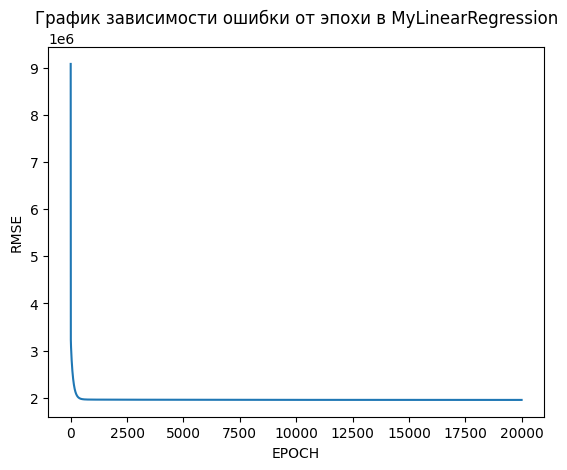

In [158]:
epochs = np.arange(len(my_linear_regression.story))
plt.plot(epochs, my_linear_regression.story)
plt.title("График зависимости ошибки от эпохи в MyLinearRegression")
plt.xlabel("EPOCH")
plt.ylabel("RMSE")
plt.show()

In [159]:
# обучим LinearRegression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [162]:
# сдеалем предсказание (метрика RMSE)
print(f"RMSE на TEST для LinearRegression: {(mean_squared_error(y_true=y_test, y_pred=baseline_model.predict(X_test)) ** 0.5) * 1000000}")

RMSE на TEST для LinearRegression: 1547615.8466834729


In [163]:
# сравним нашу линейную регрессию и регрессию из sklearn
print(f"RMSE на TEST для LinearRegression: {(mean_squared_error(y_true=y_test, y_pred=baseline_model.predict(X_test)) ** 0.5) * 1000000}")
print(f"RMSE на TEST для MyLinearRegression: {(mean_squared_error(y_true=y_test, y_pred=my_linear_regression.predict(X_test)) ** 0.5) * 1000000}")

RMSE на TEST для LinearRegression: 1547615.8466834729
RMSE на TEST для MyLinearRegression: 1550728.5166845063


In [164]:
# напишем функцию для сохранения моделей
def save_model(model, path):
    with open(path, 'wb') as f:
        pickle.dump(model, f)
    print("Модель успешно сохранена")

In [165]:
save_model(baseline_model, 'baseline.pkl')
save_model(encoder, 'encoder.pkl')
save_model(scaler, 'scaler.pkl')

Модель успешно сохранена
Модель успешно сохранена
Модель успешно сохранена


#### Ласссо регрессия

In [167]:
# обучим Лассо регрессию, параметры подберем с помощью GridSearch
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3], 
}
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid=param_grid, cv=4, scoring="neg_mean_squared_error")
grid_lasso.fit(X_train, y_train)
best_params = grid_lasso.best_params_
print(f"Лучший скор: {((-1 * grid_lasso.best_score_) ** 0.5) * 1000000}")
print(f"Лучшие гиперпараметры: {grid_lasso.best_params_ }")

Лучший скор: 1979250.8470115236
Лучшие гиперпараметры: {'alpha': 0.001, 'max_iter': 1000, 'tol': 0.001}


In [168]:
lasso = grid_lasso.best_estimator_

In [169]:
# сдеалем предсказание (метрика RMSE)
print(f"RMSE на TEST для Lasso: {(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)) ** 0.5) * 1000000}")

RMSE на TEST для Lasso: 1545408.4089599415


#### Ridge регрессия

In [170]:
# обучим Ridge регрессию, параметры подберем с помощью GridSearch
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [None, 500, 1000, 5000], 
    'tol': [1e-4, 1e-3] 
}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid=param_grid, cv=4, scoring="neg_mean_squared_error")
grid_ridge.fit(X_train, y_train)
best_params = grid_ridge.best_params_
print(f"Лучший скор: {((-1 * grid_ridge.best_score_) ** 0.5) * 1000000}")
print(f"Лучшие гиперпараметры: {grid_ridge.best_params_ }")

Лучший скор: 1979051.1704709327
Лучшие гиперпараметры: {'alpha': 0.1, 'max_iter': None, 'tol': 0.0001}


In [171]:
ridge = grid_ridge.best_estimator_

In [172]:
# сдеалем предсказание (метрика RMSE)
print(f"RMSE на TEST для Ridge: {(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)) ** 0.5) * 1000000}")

RMSE на TEST для Ridge: 1548825.6749594174


#### Дерево решений

In [173]:
# обучим дерево решений, параметры подберем с помощью GridSearch
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [10, 20, 50, None],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}

tree = DecisionTreeRegressor()
grid_tree = GridSearchCV(tree, param_grid=param_grid, cv=4, scoring="neg_mean_squared_error")
grid_tree.fit(X_train, y_train)
best_params = grid_tree.best_params_
print(f"Лучший скор: {((-1 * grid_tree.best_score_) ** 0.5) * 1000000}")
print(f"Лучшие гиперпараметры: {grid_tree.best_params_ }")

Лучший скор: 1612168.0451823412
Лучшие гиперпараметры: {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [174]:
tree = grid_tree.best_estimator_

In [175]:
# сдеалем предсказание (метрика RMSE)
print(f"RMSE на TEST для Tree: {(mean_squared_error(y_true=y_test, y_pred=tree.predict(X_test)) ** 0.5) * 1000000}")

RMSE на TEST для Tree: 1634731.8021016673


#### XGBRegressor

In [176]:
# обучим дерево решений, параметры подберем с помощью RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.logspace(-3, -1, 5), 
    'subsample': np.linspace(0.6, 1.0, 5),
    'gamma': np.linspace(0, 1, 5),
    'min_child_weight': np.arange(1, 6),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5)
}

random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_dist,
    n_iter=300,
    cv=4,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print(f"Лучший скор: {((-1 * random_search.best_score_) ** 0.5) * 1000000}")
print(f"Лучшие гиперпараметры: {random_search.best_params_ }")

Лучший скор: 1574128.2881325257
Лучшие гиперпараметры: {'subsample': 0.8, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 350, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.03162277660168379, 'gamma': 0.0}


In [177]:
xgb = random_search.best_estimator_

In [178]:
# сдеалем предсказание (метрика RMSE)
print(f"RMSE на TEST для XGBRegressor: {(mean_squared_error(y_true=y_test, y_pred=xgb.predict(X_test)) ** 0.5) * 1000000}")

RMSE на TEST для XGBRegressor: 1157686.7834582904


#### CatBoost

In [179]:
# обучим CatBoost, параметры подберем с помощью GridSearch

param_grid = {
    'iterations': [300, 500], 
    'learning_rate': [0.001, 0.01, 0.1], 
    'depth': [4, 6, 8, 12], 
    'l2_leaf_reg': [1, 3, 5], 
}

ct_boosting = CatBoostRegressor(verbose=False, random_state=42)
grid_ct_boosting = GridSearchCV(ct_boosting, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')
grid_ct_boosting.fit(X_train, y_train)
best_params = grid_ct_boosting.best_params_
print(f"Лучший скор: {((-1 * grid_ct_boosting.best_score_) ** 0.5) * 1000000}")
print(f"Лучшие гиперпараметры: {grid_ct_boosting.best_params_ }")

Лучший скор: 1597766.0348648175
Лучшие гиперпараметры: {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [180]:
ct_boosting = grid_ct_boosting.best_estimator_

In [181]:
# сдеалем предсказание (метрика RMSE)
print(f"RMSE на TEST для CatBoost: {(mean_squared_error(y_true=y_test, y_pred=ct_boosting.predict(X_test)) ** 0.5) * 1000000}")

RMSE на TEST для CatBoost: 1230598.33344424


In [182]:
save_model(ct_boosting, "catboost.pkl")

Модель успешно сохранена


#### Сравним результаты моделей и выберем лучшую

In [185]:
print(f"RMSE на TEST для LinearRegression: {(mean_squared_error(y_true=y_test, y_pred=baseline_model.predict(X_test)) ** 0.5) * 1000000}")
print(f"RMSE на TEST для MyLinearRegression: {(mean_squared_error(y_true=y_test, y_pred=my_linear_regression.predict(X_test)) ** 0.5) * 1000000}")
print(f"RMSE на TEST для Lasso: {(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)) ** 0.5) * 1000000}")
print(f"RMSE на TEST для Ridge: {(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)) ** 0.5) * 1000000}")
print(f"RMSE на TEST для Tree: {(mean_squared_error(y_true=y_test, y_pred=tree.predict(X_test)) ** 0.5) * 1000000}")
print(f"RMSE на TEST для XGBRegressor: {(mean_squared_error(y_true=y_test, y_pred=xgb.predict(X_test)) ** 0.5) * 1000000}")
print(f"RMSE на TEST для CatBoost: {(mean_squared_error(y_true=y_test, y_pred=ct_boosting.predict(X_test)) ** 0.5) * 1000000}")
print(f"Лучшая модель: XGBRegressor, c RMSE: 1157686.7834582904")

RMSE на TEST для LinearRegression: 1547615.8466834729
RMSE на TEST для MyLinearRegression: 1550728.5166845063
RMSE на TEST для Lasso: 1545408.4089599415
RMSE на TEST для Ridge: 1548825.6749594174
RMSE на TEST для Tree: 1634731.8021016673
RMSE на TEST для XGBRegressor: 1157686.7834582904
RMSE на TEST для CatBoost: 1230598.33344424
Лучшая модель: XGBRegressor, c RMSE: 1157686.7834582904
